In [1]:
! pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


**Data Pre-processing**
Before we can visualize images from the CIFAR-10 dataset, we need to pre-process the data. Here some common pre-processing tasks that we performed:

**1. Load the CIFAR-10 dataset**
The CIFAR-10 dataset is available in the **tensorflow** library. You can load the dataset using the following code:


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tempfile
import zipfile
import os
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


This will load the CIFAR-10 dataset into four NumPy arrays:

**x_train**: A 4D array of shape **(50000, 32, 32, 3)** containing the training images.

**y_train**: A 2D array of shape **(50000, 1)** containing the training labels.

**x_test**: A 4D array of shape **(10000, 32, 32, 3)** containing the test images.

**y_test**: A 2D array of shape **(10000, 1)** containing the test labels.

**2. Normalize the pixel values**

The pixel values in the CIFAR-10 dataset range from 0 to 255. To make it easier for the model to learn, we can normalize the pixel values to be between 0 and 1. Here's how you can do it:

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0



**3. Convert the labels to one-hot encoding**

The labels in the CIFAR-10 dataset are integers between 0 and 9. To train the model, we need to convert these integers to one-hot encoded vectors. Here's how you can do it:

In [5]:
num_classes = 10

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


**`4. Split the data into training and validation sets`**
To evaluate the performance of the model during training, we need to split the training data into a training set and a validation set. Here's how you can do it:

In [6]:
from sklearn.model_selection import train_test_split

train_images, x_val, train_labels, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

**Visualize Images**
Once the data is pre-processed, we can visualize some images from the CIFAR-10 dataset using Matplotlib

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


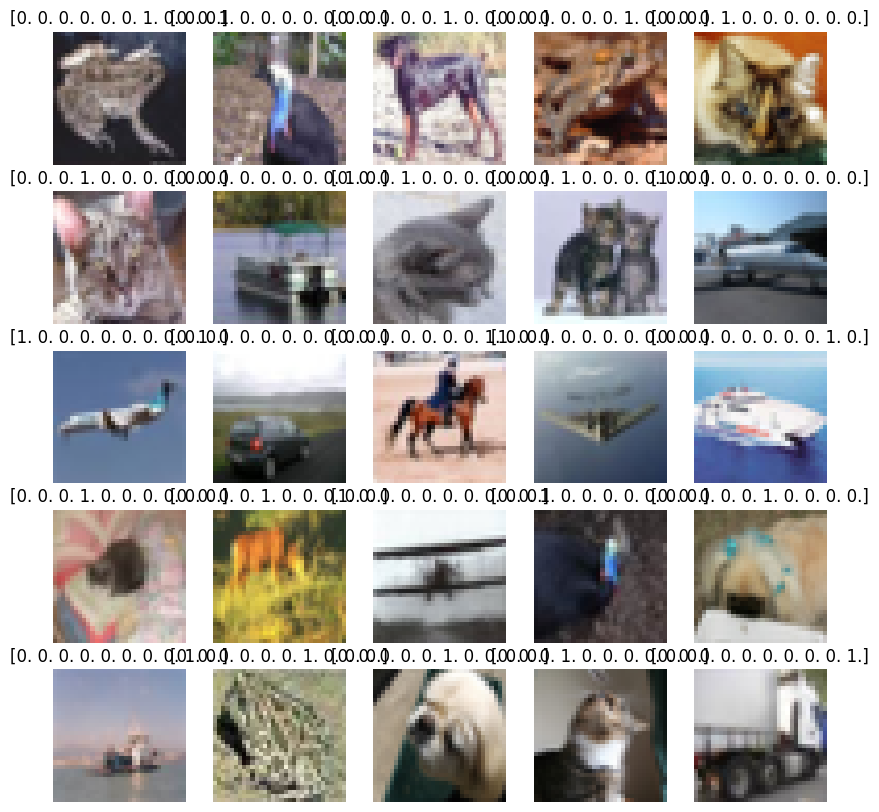

In [7]:
import matplotlib.pyplot as plt

# Plot the first 25 images in the training set
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        idx = i*5 + j
        ax[i][j].imshow(train_images[idx])
        ax[i][j].set_title(train_labels[idx])
        ax[i][j].axis('off')
plt.show()


here, Training a Keras Sequential model **without weight clustering** on the CIFAR-10 dataset using the optimal hyperparameters obtained after tuning. We will be using the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric.

In [27]:
num_filters = 128
filter_size = 3
pool_size = 2
dropout_rate = 0.2
hidden_units = 512
learning_rate = 0.001
batch_size = 128
epochs = 50

In [28]:
# Load cifar dataset
cifar = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32') / 255.0

# Define the model architecture.
model = keras.Sequential([
    keras.layers.Conv2D(num_filters, filter_size, activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Conv2D(num_filters, filter_size, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool_size),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Flatten(),
    keras.layers.Dense(hidden_units, activation='relu'),
    keras.layers.Dropout(dropout_rate),
    keras.layers.Dense(10, activation='softmax')
])

In [29]:
# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_split=0.1,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 297s 210ms/step - loss: 1.4846 - accuracy: 0.4624 - val_loss: 1.1454 - val_accuracy: 0.6042
Epoch 2/10
1407/1407 [==============================] - 285s 203ms/step - loss: 1.1321 - accuracy: 0.6021 - val_loss: 0.9905 - val_accuracy: 0.6620
Epoch 3/10
1407/1407 [==============================] - 286s 204ms/step - loss: 0.9811 - accuracy: 0.6562 - val_loss: 0.9168 - val_accuracy: 0.6886
Epoch 4/10
1407/1407 [==============================] - 291s 207ms/step - loss: 0.8746 - accuracy: 0.6913 - val_loss: 0.8600 - val_accuracy: 0.7114
Epoch 5/10
1407/1407 [==============================] - 284s 202ms/step - loss: 0.7896 - accuracy: 0.7253 - val_loss: 0.8181 - val_accuracy: 0.7200
Epoch 6/10
1407/1407 [==============================] - 283s 201ms/step - loss: 0.7186 - accuracy: 0.7453 - val_loss: 0.8101 - val_accuracy: 0.7226
Epoch 7/10
1407/1407 [==============================] - 282s 201ms/step - loss: 0.6534 - accuracy: 0.7711 - val_loss: 0.837

In [30]:
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Baseline test accuracy: 0.7279000282287598
Saving model to:  /tmp/tmp7z42uqjj.h5


**Fine Tune the Pretrained baseline model with weight clustering then define the model and apply the clustering API.**


In [31]:
import tensorflow_model_optimization as tfmot

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 16,
  'cluster_centroids_init': CentroidInitialization.LINEAR
}

# Cluster a whole model
clustered_model = cluster_weights(model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_conv2d_3 (ClusterWe  (None, 30, 30, 128)      7056      
 ights)                                                          
                                                                 
 cluster_max_pooling2d_3 (Cl  (None, 15, 15, 128)      0         
 usterWeights)                                                   
                                                                 
 cluster_dropout_3 (ClusterW  (None, 15, 15, 128)      0         
 eights)                                                         
                                                                 
 cluster_conv2d_4 (ClusterWe  (None, 13, 13, 128)      295056    
 ights)                                                          
                                                                 
 cluster_max_pooling2d_4 (Cl  (None, 6, 6, 128)       

Fine tune the model with clustering for **10 epochs** and evaluated the accuracy in the test data against the baseline model.

In [33]:
# Fine-tune model
clustered_model.fit(
  train_images,
  train_labels,
  batch_size=500,
  epochs=10,
  validation_split=0.1)


Epoch 1/10
90/90 [==============================] - 316s 3s/step - loss: 0.3097 - accuracy: 0.8995 - val_loss: 0.8570 - val_accuracy: 0.7280
Epoch 2/10
90/90 [==============================] - 286s 3s/step - loss: 0.2624 - accuracy: 0.9195 - val_loss: 0.8386 - val_accuracy: 0.7356
Epoch 3/10
90/90 [==============================] - 285s 3s/step - loss: 0.2402 - accuracy: 0.9281 - val_loss: 0.8294 - val_accuracy: 0.7424
Epoch 4/10
90/90 [==============================] - 283s 3s/step - loss: 0.2265 - accuracy: 0.9341 - val_loss: 0.8247 - val_accuracy: 0.7474
Epoch 5/10
90/90 [==============================] - 287s 3s/step - loss: 0.2189 - accuracy: 0.9364 - val_loss: 0.8261 - val_accuracy: 0.7462
Epoch 6/10
90/90 [==============================] - 288s 3s/step - loss: 0.2119 - accuracy: 0.9380 - val_loss: 0.8219 - val_accuracy: 0.7488
Epoch 7/10
90/90 [==============================] - 288s 3s/step - loss: 0.2059 - accuracy: 0.9404 - val_loss: 0.8224 - val_accuracy: 0.7488
Epoch 8/10
90

Now, we evaluate the clustered model against the baseline model

In [34]:
_, clustered_model_accuracy = clustered_model.evaluate(
  test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)
print('Clustered test accuracy:', clustered_model_accuracy)

Baseline test accuracy: 0.7279000282287598
Clustered test accuracy: 0.7350000143051147


**Fine Tune the Pretrained baseline model with weight clustering then define the model and apply the clustering API.**



Now, we Build compressed models from clustering using strip_clustering and TFLite and then compare the size of baseline and the compressed models.

After applying weight clustering, we can build compressed models to reduce the size of the model. In this step, we will use the **strip_clustering** and **TFLite** to build compressed models and compare their sizes with the baseline model.

First, we will use the strip_clustering API to remove the clustering wrappers from the model and obtain a pruned model. We will then save this model for later use.

In [35]:
final_model = tfmot.clustering.keras.strip_clustering(clustered_model)

_, clustered_keras_file = tempfile.mkstemp('.h5')
print('Saving clustered model to: ', clustered_keras_file)
tf.keras.models.save_model(final_model, clustered_keras_file, 
                           include_optimizer=False)

Saving clustered model to:  /tmp/tmp3moj719m.h5


Next, we will use TFLite to create a compressed model from the pruned model. We can use the TFLiteConverter class from TensorFlow to convert the pruned model to a **TFLite model**. During the conversion, we can specify a number of optimizations to apply, including quantization.

In [36]:
clustered_tflite_file = '/tmp/clustered_mnist.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
tflite_clustered_model = converter.convert()
with open(clustered_tflite_file, 'wb') as f:
  f.write(tflite_clustered_model)
print('Saved clustered TFLite model to:', clustered_tflite_file)

Saved clustered TFLite model to: /tmp/clustered_mnist.tflite


Finally, we can compare the sizes of the baseline, pruned, and compressed models.

In [37]:
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [38]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered Keras model: %.2f bytes" % (get_gzipped_model_size(clustered_keras_file)))
print("Size of gzipped clustered TFlite model: %.2f bytes" % (get_gzipped_model_size(clustered_tflite_file)))

Size of gzipped baseline Keras model: 9401902.00 bytes
Size of gzipped clustered Keras model: 858606.00 bytes
Size of gzipped clustered TFlite model: 884003.00 bytes


By comparing the sizes, we can see the benefits of applying weight clustering and compression to the model. The stripped model is smaller than the baseline model, and the compressed model is even smaller than the stripped model. This reduction in size can be beneficial for deployment on resource-constrained devices.

In [39]:
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

_, quantized_and_clustered_tflite_file = tempfile.mkstemp('.tflite')

with open(quantized_and_clustered_tflite_file, 'wb') as f:
  f.write(tflite_quant_model)

print('Saved quantized and clustered TFLite model to:', quantized_and_clustered_tflite_file)
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped clustered and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_clustered_tflite_file)))

Saved quantized and clustered TFLite model to: /tmp/tmpu5ribytp.tflite
Size of gzipped baseline Keras model: 9401902.00 bytes
Size of gzipped clustered and quantized TFlite model: 649707.00 bytes


In [40]:
def eval_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

In [41]:
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()

test_accuracy = eval_model(interpreter)

print('Clustered and quantized TFLite test_accuracy:', test_accuracy)
print('Clustered TF test accuracy:', clustered_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Clustered and quantized TFLite test_accuracy: 0.1
Clustered TF test accuracy: 0.7350000143051147
